### 통계 분석
* 회귀분석과 상관분석

> 01 [기술 통계 분석 + 그래프] 와인 품질 등급 예측하기
>
> 02 [상관 분석 + 히트맵] 타이타닉호 생존율 분석하기
>

* 01 와인 품질 등급 예측

> 와인 속성을 분석, 품질 등급 예측
>
> 기술 통계, 회귀 분석, t-검정, 히스토그램

##### 7번째 셀에서 ignore_index=True 면 마지막 부분회귀의 표기 숫자는 index 값이라는 것을 알 수 있다.

In [1]:
import pandas as pd

In [2]:
red_df = pd.read_csv('211207 [기술 통계 분석 + 그래프] 와인 품질 등급 예측하기/data/winequality-red2.csv', header=0, engine='python')
white_df = pd.read_csv('211207 [기술 통계 분석 + 그래프] 와인 품질 등급 예측하기/data/winequality-white2.csv')

In [3]:
red_df.shape

(1599, 12)

#### red_df, white_df 를 합치기

> 0 컬럼에 type열을 생성 red 값 입력

In [4]:
red_df.insert(0, column='type', value='red')

> 0 컬럼에 type열을 생성 white 값 입력

In [5]:
white_df.insert(0, column='type', value='white')

In [6]:
white_df.shape

(4898, 13)

> wine 이라는 변수에 red, white dataframe 을 합쳐보자

In [7]:
wine = pd.concat([red_df, white_df], ignore_index=True)

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


> 컬럼 명에 띄어쓰기 부분을 '_' 로 변경

In [9]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [11]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

> 기술 통계보기

In [12]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [13]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [14]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

> Aggregate(집계) 함수를 사용하여 평균값과 표준편차를 한번에 출력

In [15]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


#### 데이터 모델링

> t-검정과 회귀 분석으로 그룹 비교하기

In [16]:
from scipy import stats
from statsmodels.formula.api import ols,glm

In [17]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

두 종의 와인간의 평균의 차이가 있는지 t-test로 확인 equal_var(등분산성)

In [18]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [19]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'
regression_result = ols(Rformula, data=wine).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:05:39   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

> 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

독립변수가 아닌 quality 와 type 컬럼을 제외

In [21]:
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1 = sample1[0:5][:]
sample1_predict = regression_result.predict(sample1)
sample1_predict   # 회귀 분석식에서 나온값

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [22]:
wine[0:5]['quality']   # 실제 값. (차이가 거의 읎...)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

* 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

> 딕셔너리로 컬럼대비 값을 임의 입력하여 실험(값을 바꿔가며 테스트 할 수 있다.)

In [23]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5], "citric_acid":[0.3, 0.4],
        "residual_sugar":[6.1, 5.8], "chlorides":[0.055,0.04], "free_sulfur_dioxide":[30.0, 31.0],
        "total_sulfur_dioxide":[98.0,99], "density":[0.996, 0.91], "pH":[3.25, 3.01],
        "sulphates":[0.4, 0.35], "alcohol":[9.0, 0.88]}

In [24]:
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [25]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

#### 결과 시각화

> 와인 유형에 따른 품질 등급 히스토그램 그리기

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


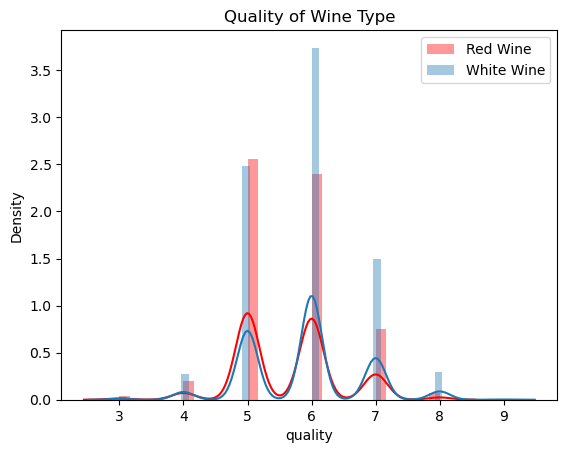

In [27]:
# sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color='red', label='Red Wine')
sns.distplot(white_wine_quality, kde=True, label='White Wine')

plt.title('Quality of Wine Type')
plt.legend()
plt.show()

#### 부분 회귀 plot으로 시각화하기

In [28]:
import statsmodels.api as sm

* 'quality','fixed_acidity'를 제외한 나머지를 others(독립변수) 에 저장
* 

eval_env: 1


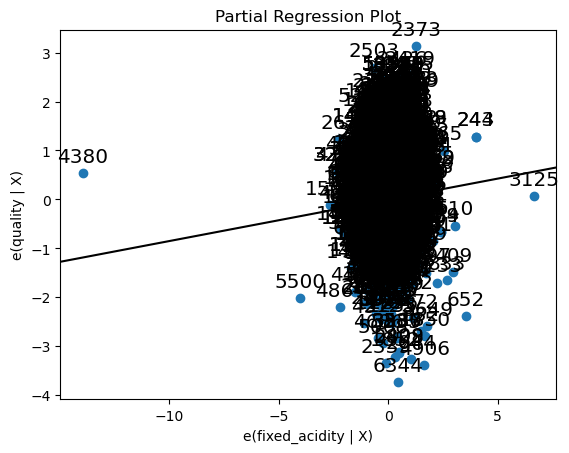

In [29]:
others = list(set(wine.columns).difference(set(['quality','fixed_acidity'])))

p, resids = sm.graphics.plot_partregress('quality','fixed_acidity', others, data=wine, ret_coords=True)
 # plot_partregress(부분회귀) 'quality','fixed_acidity'(종속변수), others를 독립변수로 두고 ret_coords(잔차) 표시
plt.show()
# 위에서 언급한 ignore_index=True로 표기되는 숫자값이 바뀌는것. 이걸로 표기되는 숫자가 index 값이라는걸 알 수있다.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


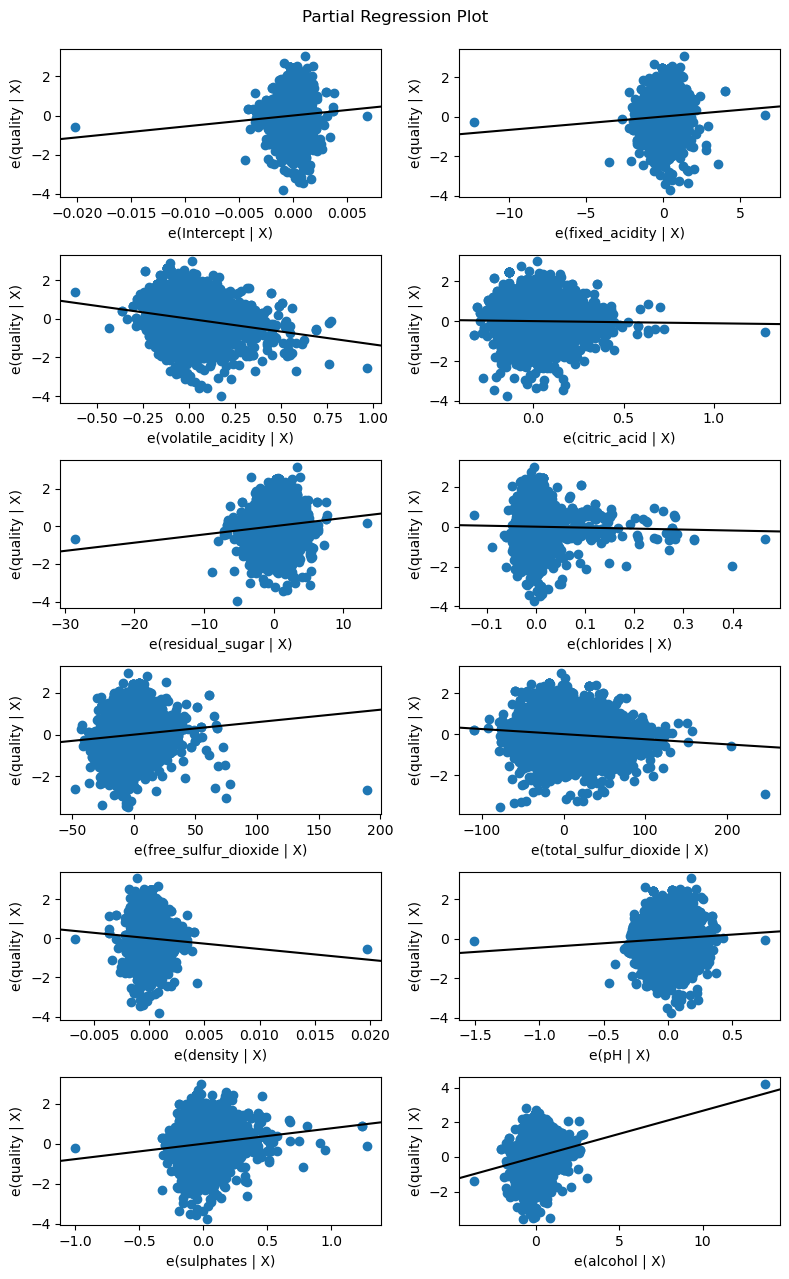

In [30]:
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

>타이타닉호 생존율 분석